In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.00,7043.00,7043.00
mean,0.16,32.37,64.76
std,0.37,24.56,30.09
min,0.00,0.00,18.25
25%,0.00,9.00,35.50
50%,0.00,29.00,70.35
75%,0.00,55.00,89.85
max,1.00,72.00,118.75


In [9]:
data['TotalCharges'] = data['TotalCharges'].astype(float)

ValueError: could not convert string to float: ' '

During the conversion of the **TotalCharges** column to float, an error was encountered due to the presence of empty strings, preventing the direct conversion of string to float.

In [14]:
non_convertible_values = data[data['TotalCharges'] == ' ']['TotalCharges']
print("Non-convertible values:", non_convertible_values.unique())
data['TotalCharges'] = data['TotalCharges'].replace(' ', np.nan)
data['TotalCharges'] = data['TotalCharges'].astype(float)
data = data[data['TotalCharges'] != ' ']
data['TotalCharges'] = data['TotalCharges'].astype(float)
data.drop(columns = ['customerID'], inplace = True)

Non-convertible values: []


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df1 = data.copy(deep = True)
text_data_features = [i for i in list(data.columns) if i not in list(data.describe().columns)]

print('Label Encoder Transformation')
for i in text_data_features :
    df1[i] = le.fit_transform(df1[i])
    print(i,' : ',df1[i].unique(),' = ',le.inverse_transform(df1[i].unique()))

Label Encoder Transformation
gender  :  [0 1]  =  ['Female' 'Male']
Partner  :  [1 0]  =  ['Yes' 'No']
Dependents  :  [0 1]  =  ['No' 'Yes']
PhoneService  :  [0 1]  =  ['No' 'Yes']
MultipleLines  :  [1 0 2]  =  ['No phone service' 'No' 'Yes']
InternetService  :  [0 1 2]  =  ['DSL' 'Fiber optic' 'No']
OnlineSecurity  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
OnlineBackup  :  [2 0 1]  =  ['Yes' 'No' 'No internet service']
DeviceProtection  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
TechSupport  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingTV  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingMovies  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
Contract  :  [0 1 2]  =  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  :  [1 0]  =  ['Yes' 'No']
PaymentMethod  :  [2 3 0 1]  =  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn  :  [0 1]  =  ['No' 'Yes']


In [21]:
df1.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7032.00,7043.00
mean,0.50,0.16,0.48,0.30,32.37,0.90,0.94,0.87,0.79,0.91,0.90,0.80,0.99,0.99,0.69,0.59,1.57,64.76,2283.30,0.27
std,0.50,0.37,0.50,0.46,24.56,0.30,0.95,0.74,0.86,0.88,0.88,0.86,0.89,0.89,0.83,0.49,1.07,30.09,2266.77,0.44
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,18.25,18.80,0.00
25%,0.00,0.00,0.00,0.00,9.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,35.50,401.45,0.00
50%,1.00,0.00,0.00,0.00,29.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,2.00,70.35,1397.47,0.00
75%,1.00,0.00,1.00,1.00,55.00,1.00,2.00,1.00,2.00,2.00,2.00,2.00,2.00,2.00,1.00,1.00,2.00,89.85,3794.74,1.00
max,1.00,1.00,1.00,1.00,72.00,1.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,1.00,3.00,118.75,8684.80,1.00


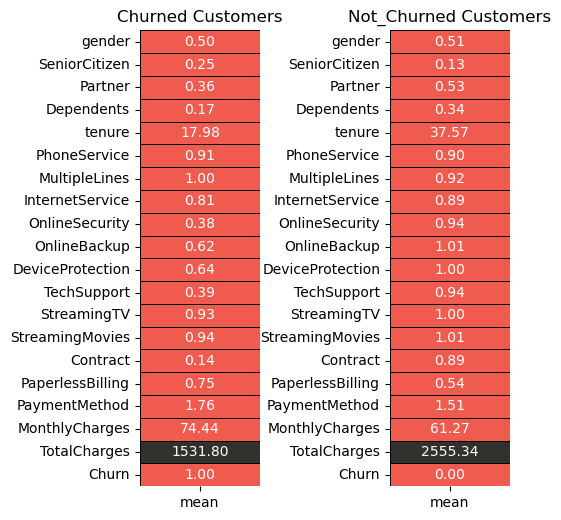

In [27]:
colors = ["#EF5C4F","#33312E"]

churn = df1[df1['Churn'] == 1].describe().T
not_churn = df1[df1['Churn'] == 0].describe().T

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,5))
plt.subplot(1,2,1)
sns.heatmap(churn[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Churned Customers');

plt.subplot(1,2,2)
sns.heatmap(not_churn[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f',)
plt.title('Not_Churned Customers');

fig.tight_layout(pad = 0)


- **Mean Tenure:** Customers who churned had a lower mean tenure (17.98 months) compared to those who continued (37.57 months).

- **Online Services:** Features like OnlineSecurity, OnlineBackup, DeviceProtection, and TechSupport have higher mean values for not-churned customers, indicating their potential role in customer retention.

- **Contract Duration:** Churned customer contracts are notably shorter than those of not-churned customers.

- **Monthly Charges:** Mean MonthlyCharges for churned customers (74.44) are higher than for not-churned customers (61.27).

- **Total Charges:** Not-churned customers have higher mean TotalCharges (2555.34) compared to churn customers (1531.80).

- **Categorical Features:** Due to numerous categorical features, mean values are concentrated around 0.

These insights highlight areas for potential focus in retaining customers and emphasize the importance of specific features in influencing customer churn. Further exploration in the EDA section will provide a more detailed analysis of these features.

In [31]:
#Dividing features into Numerical and Categorical :

col = list(df1.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(df1[i].unique()) > 4:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : gender SeniorCitizen Partner Dependents PhoneService MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies Contract PaperlessBilling PaymentMethod Churn
Numerical Features : tenure MonthlyCharges TotalCharges


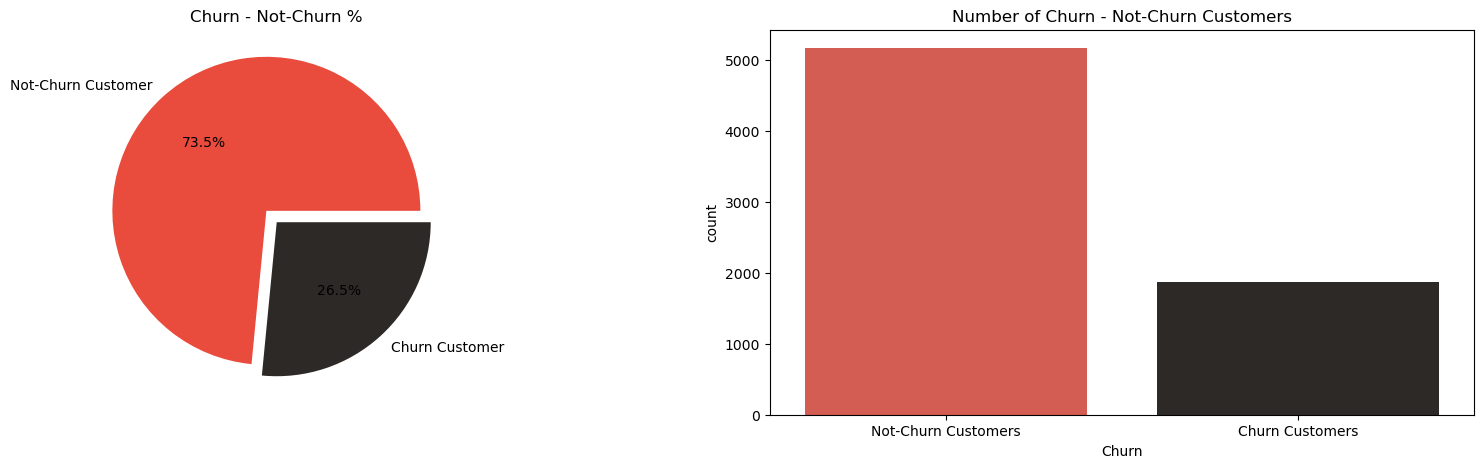

In [36]:
colors = ['#E94B3C','#2D2926']
# Assuming 'Churn' is a categorical variable with values 'Yes' and 'No'

l = list(df1['Churn'].value_counts())
circle = [l[0] / sum(l) * 100, l[1] / sum(l) * 100]

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

# Pie chart
axes[0].pie(circle, labels=['Not-Churn Customer', 'Churn Customer'], autopct='%1.1f%%', explode=(0.1, 0),
            colors=colors)
axes[0].set_title('Churn - Not-Churn %')

# Countplot
ax = sns.countplot(x='Churn', data=df1, palette=colors)

ax.set_xticklabels(['Not-Churn Customers', 'Churn Customers'])

ax.set_title('Number of Churn - Not-Churn Customers')

plt.show()


The dataset exhibits an imbalanced distribution, with a ratio of approximately 3:1 for Not-Churn to Churn customers. This imbalance introduces a bias in predictions, where the model may lean towards accurately predicting Not-Churn instances.


In [37]:
categorical_features.remove('Churn')


In [39]:
l1=['gender','SeniorCitizen','Partner','Dependents'] #Customer Information
l2=['PhoneService','MultipleLines','InternetService','StreamingTV','StreamingMovies',
    'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport']#services Signed up for!
l3=['Contract','PaperlessBilling','PaymentMethod']#Payment Information

## Group 1: Customer Information

This category encompasses attributes related to customer demographics and characteristics:

- **Gender**
- **SeniorCitizen**
- **Partner**
- **Dependents**

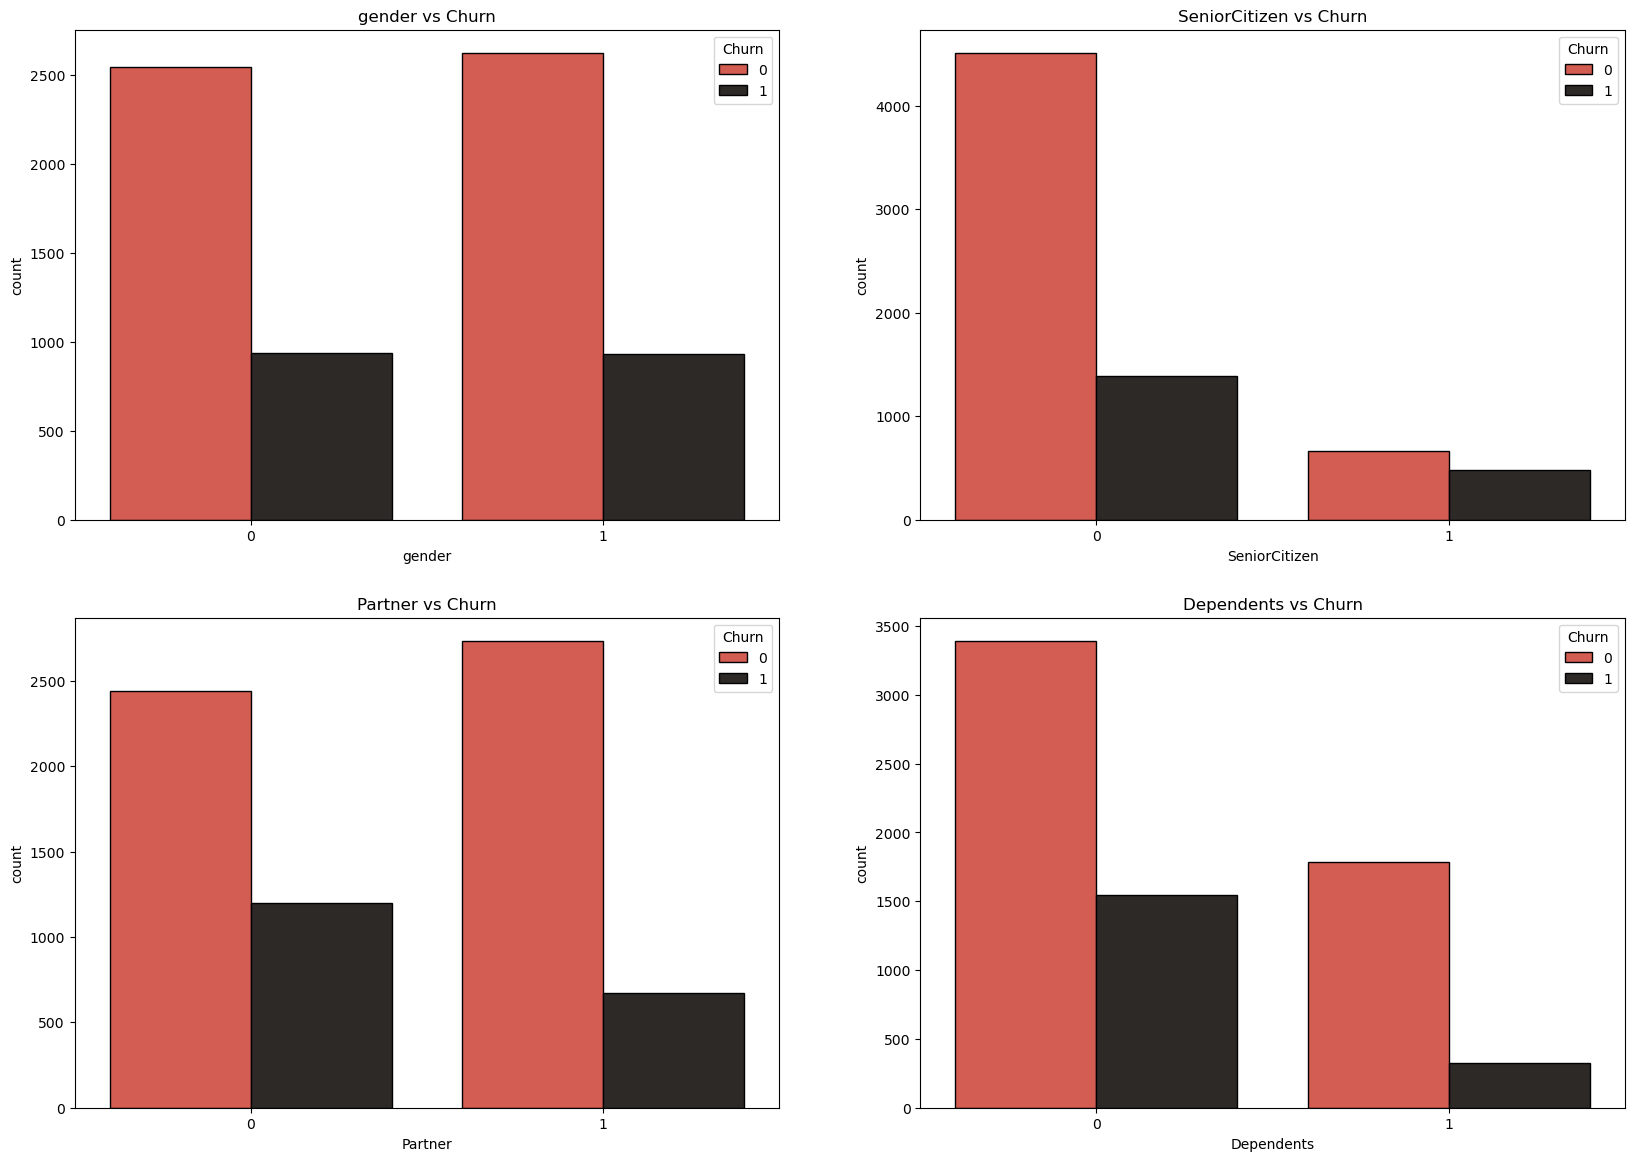

In [54]:
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (20,14))
for i in range(len(l1)):
    plt.subplot(2,2,i+1)
    ax = sns.countplot(x=l1[i],data = df1,hue = "Churn",palette = colors,edgecolor = 'black')
    title = l1[i] + ' vs Churn'
    plt.title(title);

- **Gender Churn Analysis:**
  Customer churn rates are comparable between male and female customers, indicating similarity in churn behavior across genders.

- **SeniorCitizen Analysis:**
  The number of SeniorCitizen customers is relatively low. However, among SeniorCitizens, approximately 40% experienced churn.

- **Partner Status Impact:**
  Customers residing with a partner exhibit lower churn rates compared to those without a partner.

- **Dependents Influence:**
  Churn rates are higher for customers without dependents, suggesting a potential correlation between familial status and customer retention.

These observations provide insights into specific customer segments that may require targeted retention strategies. Understanding the nuanced behavior within these groups can aid in developing more tailored approaches for customer retention.

## Group 2: Customer-Enlisted Services

- **PhoneService**
- **MultipleLines**
- **InternetService**
- **StreamingTV**
- **StreamingMovies**

This segmentation allows for a focused examination of customer behavior in terms of the services they have subscribed to, aiding in the identification of patterns and trends within these service-related attributes.

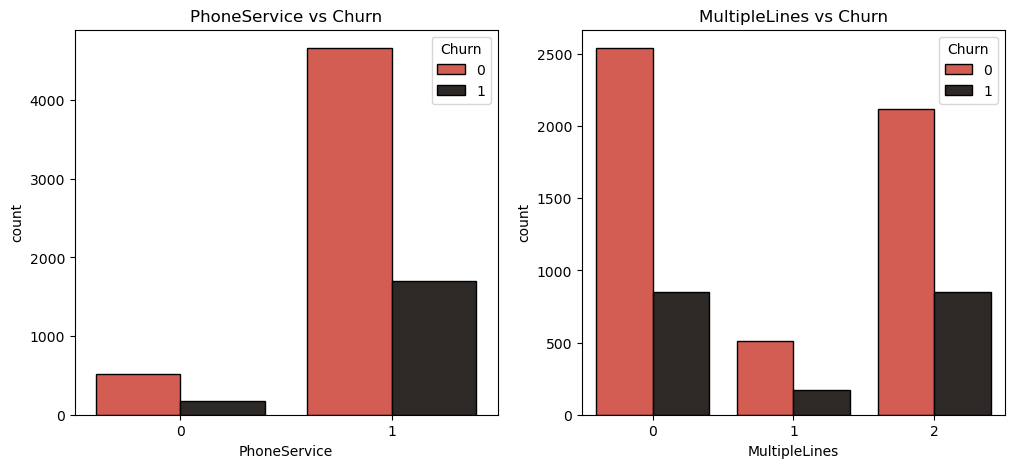

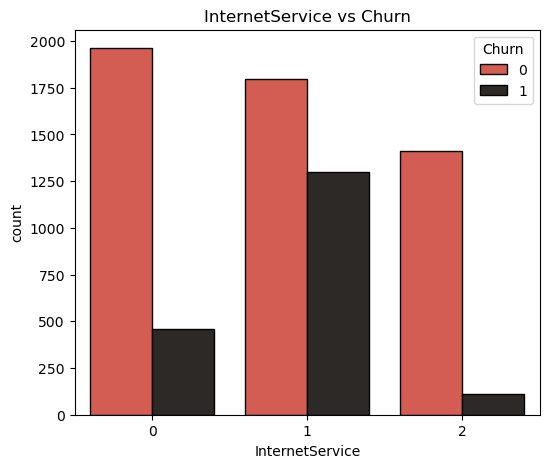

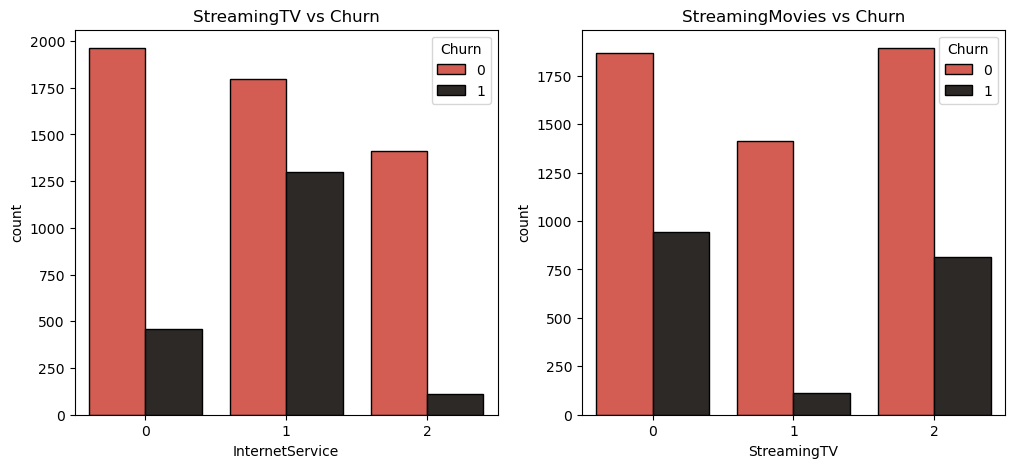

In [60]:
fig = plt.subplots(nrows = 1,ncols = 2,figsize = (12,5))

for i in range(len(l2[0:2])):
    plt.subplot(1,2,i + 1)
    ax = sns.countplot(x=l2[i],data = df1,hue = "Churn",palette = colors,edgecolor = 'black')
    title = l2[i] + ' vs Churn'
    plt.title(title);

fig = plt.subplots(nrows = 1, ncols = 1, figsize = (6,5))

plt.subplot(1,1,1)
ax = sns.countplot(x=l2[2],data = df1,hue = "Churn",palette = colors,edgecolor = 'black')
title = l2[2] + ' vs Churn'
plt.title(title);

fig = plt.subplots(nrows = 1,ncols = 2,figsize = (12,5))

for i in range(len(l2[3:5])):
    plt.subplot(1,2,i + 1)
    ax = sns.countplot(x=l2[i + 2],data = df1,hue = "Churn",palette = colors,edgecolor = 'black')
    title = l2[i + 3] + ' vs Churn'
    plt.title(title)


- **PhoneService Analysis:**
  Notably, a higher retention rate is observed among customers with no phone service compared to those who opted to discontinue the service.

- **MultipleLines Impact:**
  The churn rate appears consistent irrespective of whether customers have subscribed to multiple lines or not.

- **InternetService Preferences:**
  A considerable number of customers exhibit a preference against utilizing Fiber optic cables for InternetService. Conversely, the data suggests a greater inclination towards DSL among customers.

- **Insights on Streaming Services:**
  Both StreamingTV and StreamingMovies exhibit parallel churn patterns. Regardless of subscription status, a noteworthy number of customers have experienced churn. This implies that factors beyond streaming content alone contribute to customer disengagement.

These observations shed light on customer behavior concerning the services they avail, offering valuable insights for devising targeted strategies to enhance customer retention.

### Group 2: Customer-Enlisted Services

This category comprises features related to security and support services subscribed by the customer:

- **OnlineSecurity**
- **OnlineBackup**
- **DeviceProtection**
- **TechSupport**

Exploring these attributes will provide insights into how customers engage with security and support services, guiding the development of strategies to enhance customer satisfaction and retention.

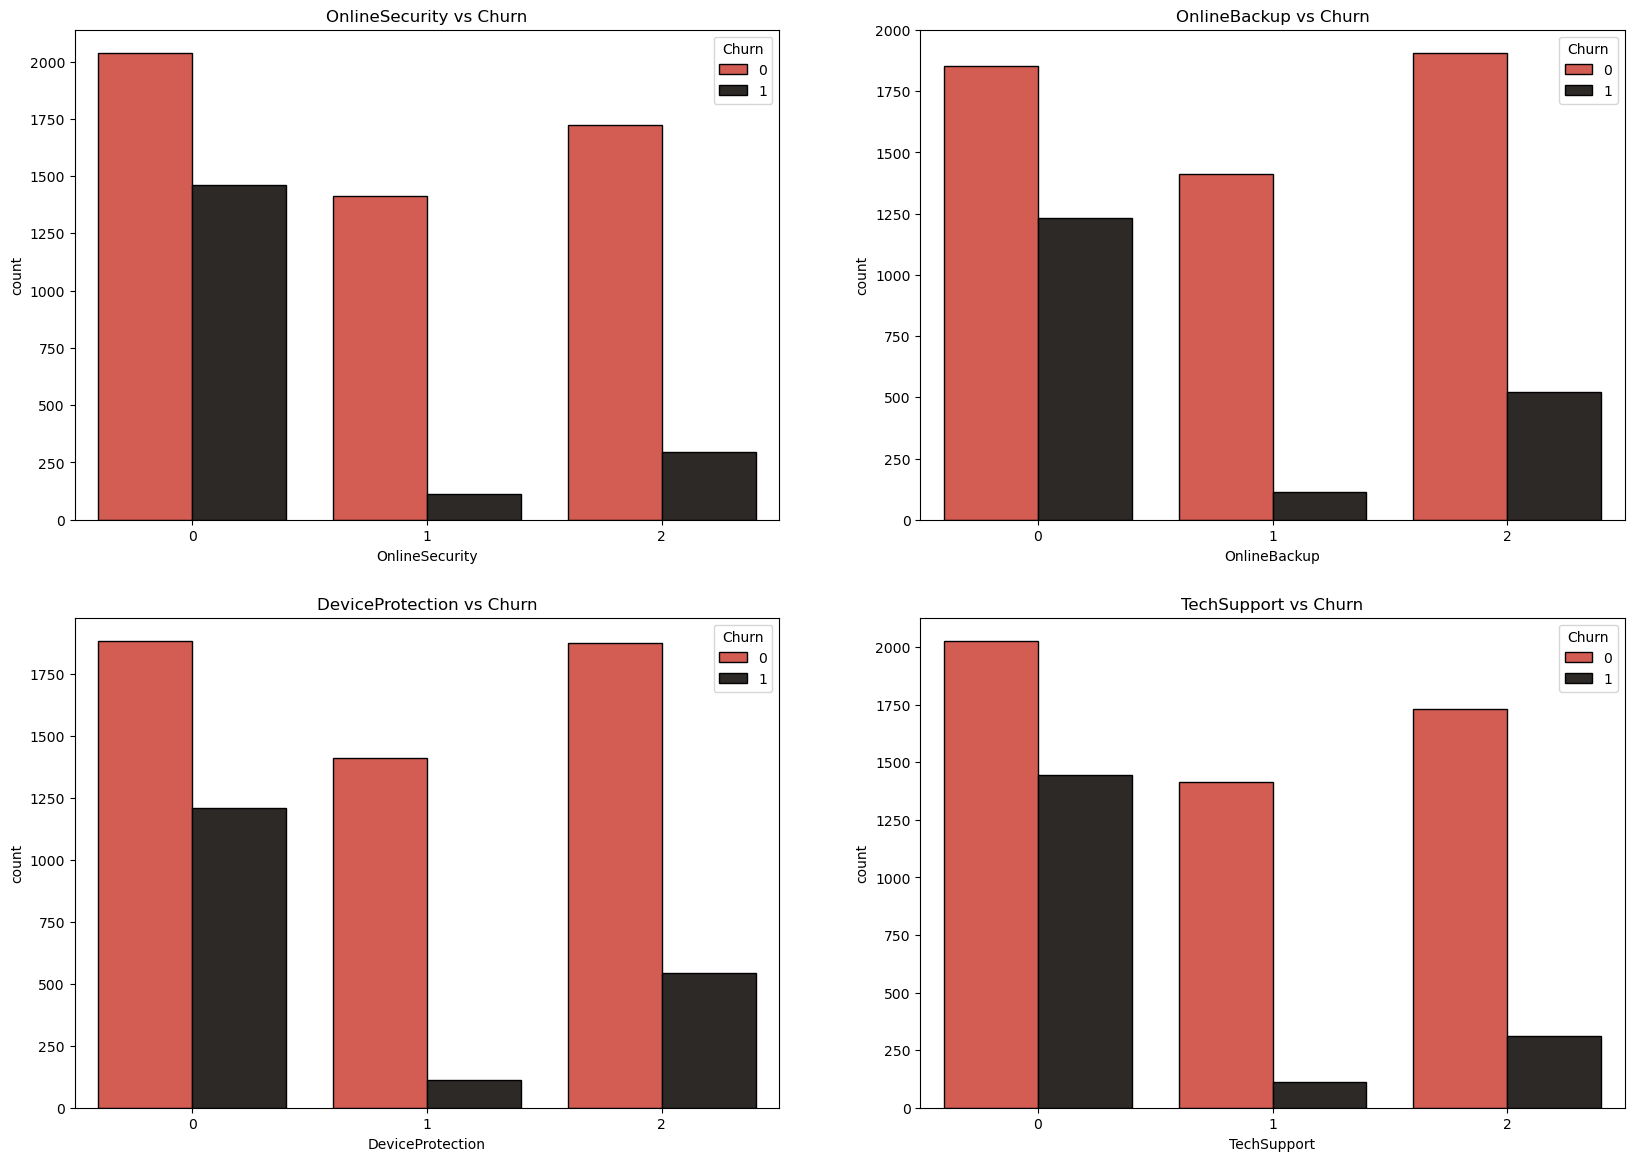

In [61]:
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (20,14))
for i in range(len(l2[-4:])):
    plt.subplot(2,2,i + 1)
    ax = sns.countplot(x=l2[-4 + i],data = df1,hue = "Churn",palette = colors,edgecolor = 'black')
    title = l2[-4 + i] + ' vs Churn'
    plt.title(title);

The visualizations indicate the critical importance of services related to OnlineSecurity, OnlineBackup, DeviceProtection, and TechSupport in retaining customers. A notable number of customers have opted to switch service providers, emphasizing the significance of providing robust and satisfactory services in these areas. These findings underscore the need for focused efforts in improving and promoting these services to enhance overall customer satisfaction and retention.

### Group 3

This group encompasses features related to contractual terms, billing preferences, and payment methods:

- **Contract**
- **PaperlessBilling**
- **PaymentMethod**

Analyzing these attributes will provide insights into customer preferences regarding contractual commitments, billing processes, and payment methods, guiding strategies for optimizing customer satisfaction and retention.

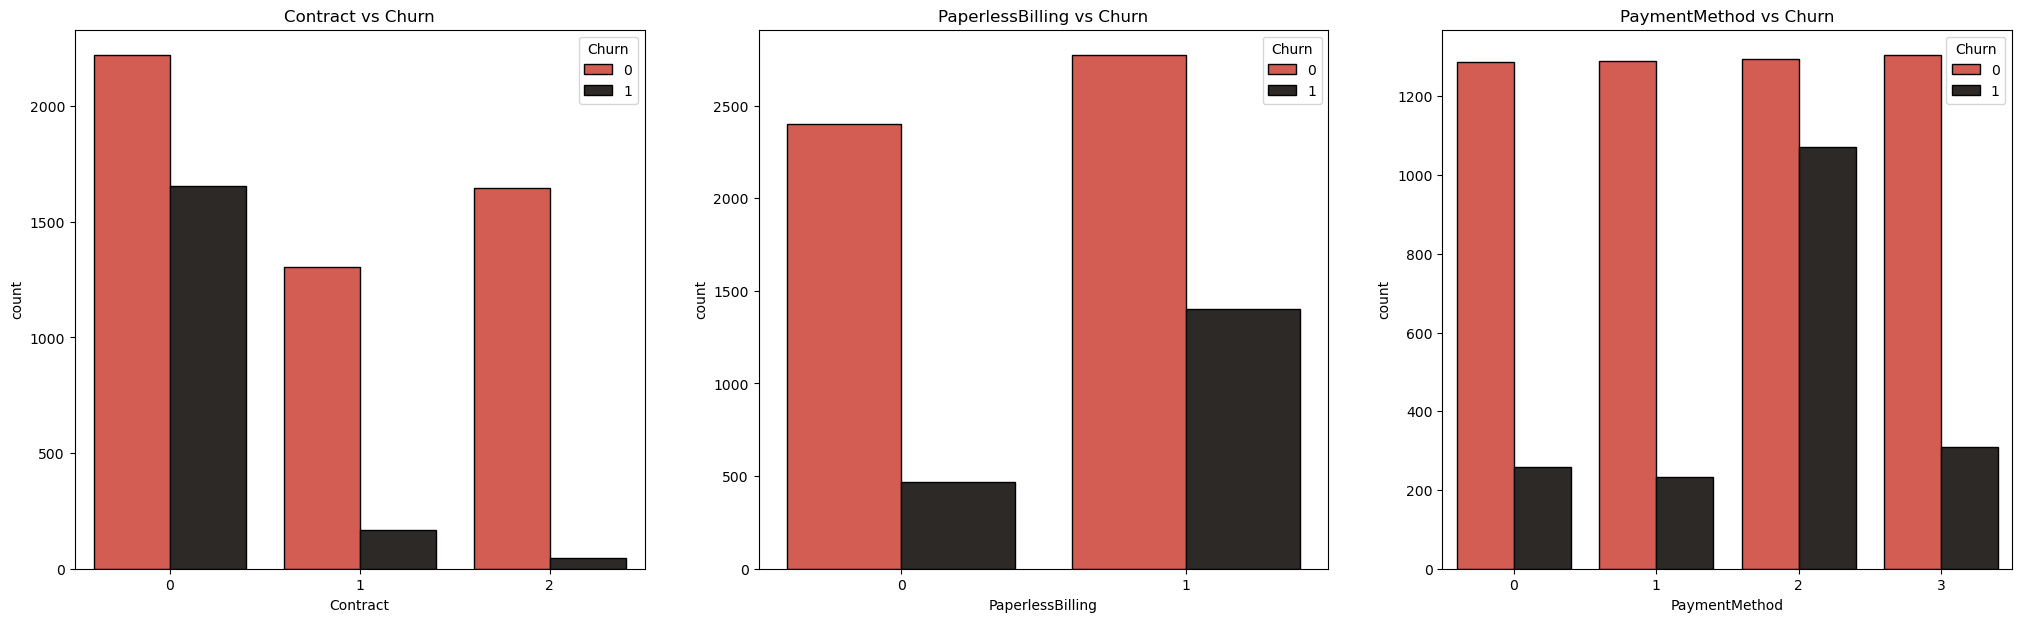

In [78]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))

plt.subplot(1,3,1)
ax = sns.countplot(x=l3[0],data = df1,hue = "Churn",palette = colors,edgecolor = 'black')
title = l3[0] + ' vs Churn'
plt.title(title);

plt.subplot(1,3,2)
ax = sns.countplot(x=l3[1],data = df1,hue = "Churn",palette = colors,edgecolor = 'black')
title = l3[1] + ' vs Churn'
plt.title(title);

plt.subplot(1,3,3)
ax = sns.countplot(x=l3[2],data = df1,hue = "Churn",palette = colors,edgecolor = 'black')
title = l3[2] + ' vs Churn'
plt.title(title);

- **Contract Analysis:**
  Customer churn is notably high for Month-to-Month contracts. This could be attributed to customers testing various services and opting for shorter-term commitments to explore available options or save costs.

- **PaperlessBilling Impact:**
  A considerable number of customers experience churn in the presence of PaperlessBilling, suggesting potential issues related to payment or receipt processes.

- **PaymentMethod Insights:**
  Customers exhibit a strong aversion to the Electronic check payment method. Many customers who used this option chose to discontinue services. Addressing issues with Electronic check or reconsidering its inclusion may be necessary for improved customer satisfaction.

These observations underscore the importance of understanding customer preferences in contractual terms, billing methods, and payment processes. Implementing measures to address specific pain points can contribute significantly to customer retention efforts.

## Numerical Features Distribution
In this analysis, we explore the distribution of numerical features to gain insights into the spread and characteristics of quantitative attributes in the dataset.

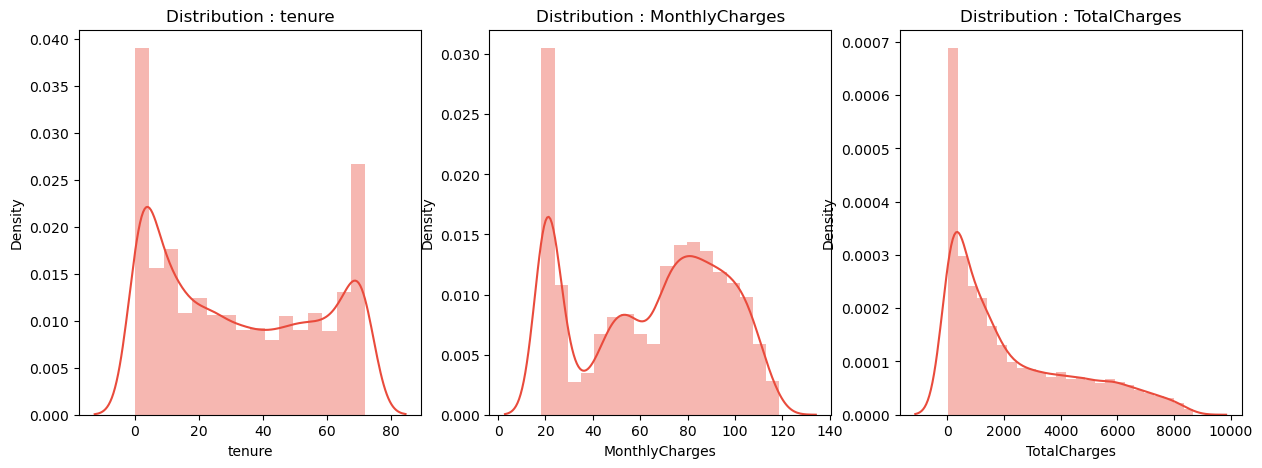

In [80]:
fig,ax=plt.subplots(nrows=1, ncols=3, figsize = (15,5))
for i in range(len(numerical_features)):
    plt.subplot(1,3,i+1)
    sns.distplot(df1[numerical_features[i]], color = colors[0])
    title = 'Distribution : '+ numerical_features[i]
    plt.title(title)
plt.show()

- **Tenure Distribution:**
  The tenure distribution exhibits a bimodal pattern with peaks at 0-70, indicating the presence of two distinct groups within the customer base.

- **MonthlyCharges Distribution:**
  MonthlyCharges create a bimodal distribution with peaks at 20-80, suggesting the existence of two prevalent cost structures or service tiers.

- **TotalCharges Distribution:**
  TotalCharges displays a positively or rightly skewed distribution, indicating a concentration of lower values with a gradual tapering towards higher values.

These numerical feature distributions provide valuable insights into the varied patterns within customer tenure, monthly charges, and total charges. Understanding these distributions aids in refining strategies for customer segmentation and engagement.

## Target Variable (Outcome) in Relation to Numerical Features

Text(0.5, 1.0, 'Monthly Charges Vs Churn Distribution')

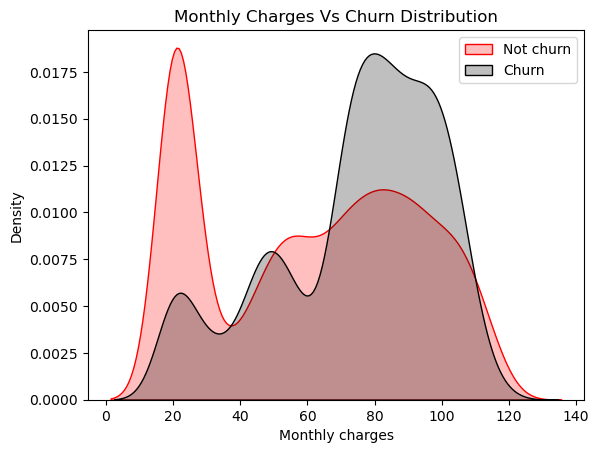

In [82]:
ax=sns.kdeplot(df1.MonthlyCharges[(df1["Churn"] == 0)],
               color="Red", shade = True);
ax=sns.kdeplot(df1.MonthlyCharges[(df1["Churn"] == 1)],
               color="Black", shade = True);

ax.legend(["Not churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly charges');
ax.set_title('Monthly Charges Vs Churn Distribution')

Customers are more likely to churn due to the presence of high monthly charges.

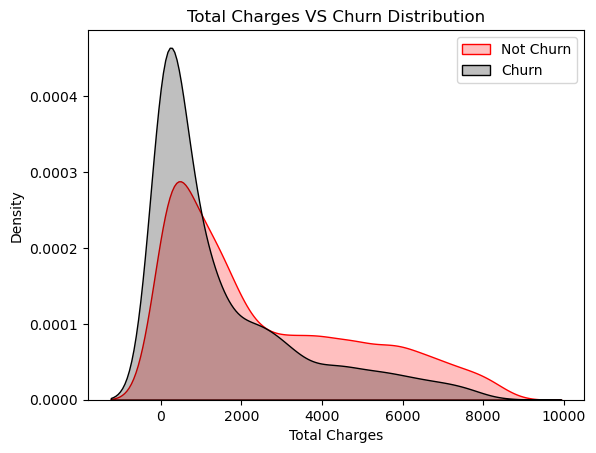

In [83]:
ax = sns.kdeplot(df1.TotalCharges[(df1["Churn"] == 0) ],
                color="red", shade = True);
ax = sns.kdeplot(df1.TotalCharges[(df1["Churn"] == 1) ],
                color="black", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Total Charges');
ax.set_title('Total Charges VS Churn Distribution');

The observation that high Total Charges are associated with a higher likelihood of customer churn suggests a potential issue with the pricing system. Addressing and optimizing the pricing structure is crucial to mitigate this factor contributing to customer churn. A thorough examination and potential adjustments in pricing strategies may help enhance customer satisfaction and retention.

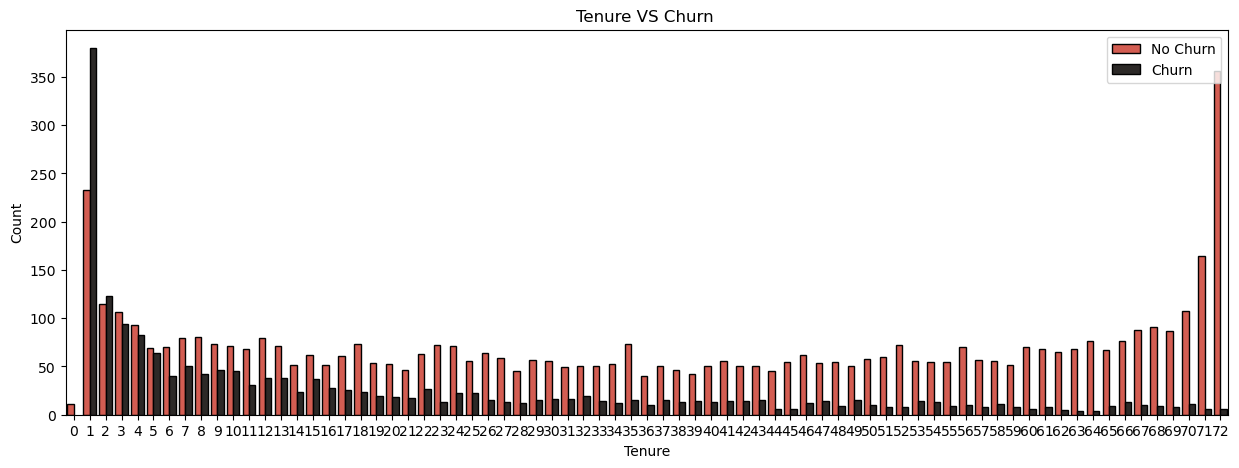

In [84]:
plt.figure(figsize = (15,5))
sns.countplot(x='tenure', data=df1, hue='Churn', palette = colors, edgecolor='black')
plt.title('Tenure VS Churn ')
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.legend(['No Churn', 'Churn'], loc='upper right')
plt.show()

- **Tenure Analysis:**
  A substantial number of customers exit within the first month, with high cancellations continuing for 4-5 months. However, churn numbers decrease as tenure increases. The graph exhibits a symmetrical pattern, with the left side dominated by high churn numbers and the right side characterized by lower churn numbers. This highlights a correlation between longer customer tenure and reduced likelihood of churn. Understanding and leveraging this trend can inform strategies to enhance customer retention over time.

## Quantitative features vs. Quantitative features with respect to the Target Variable (Churn)

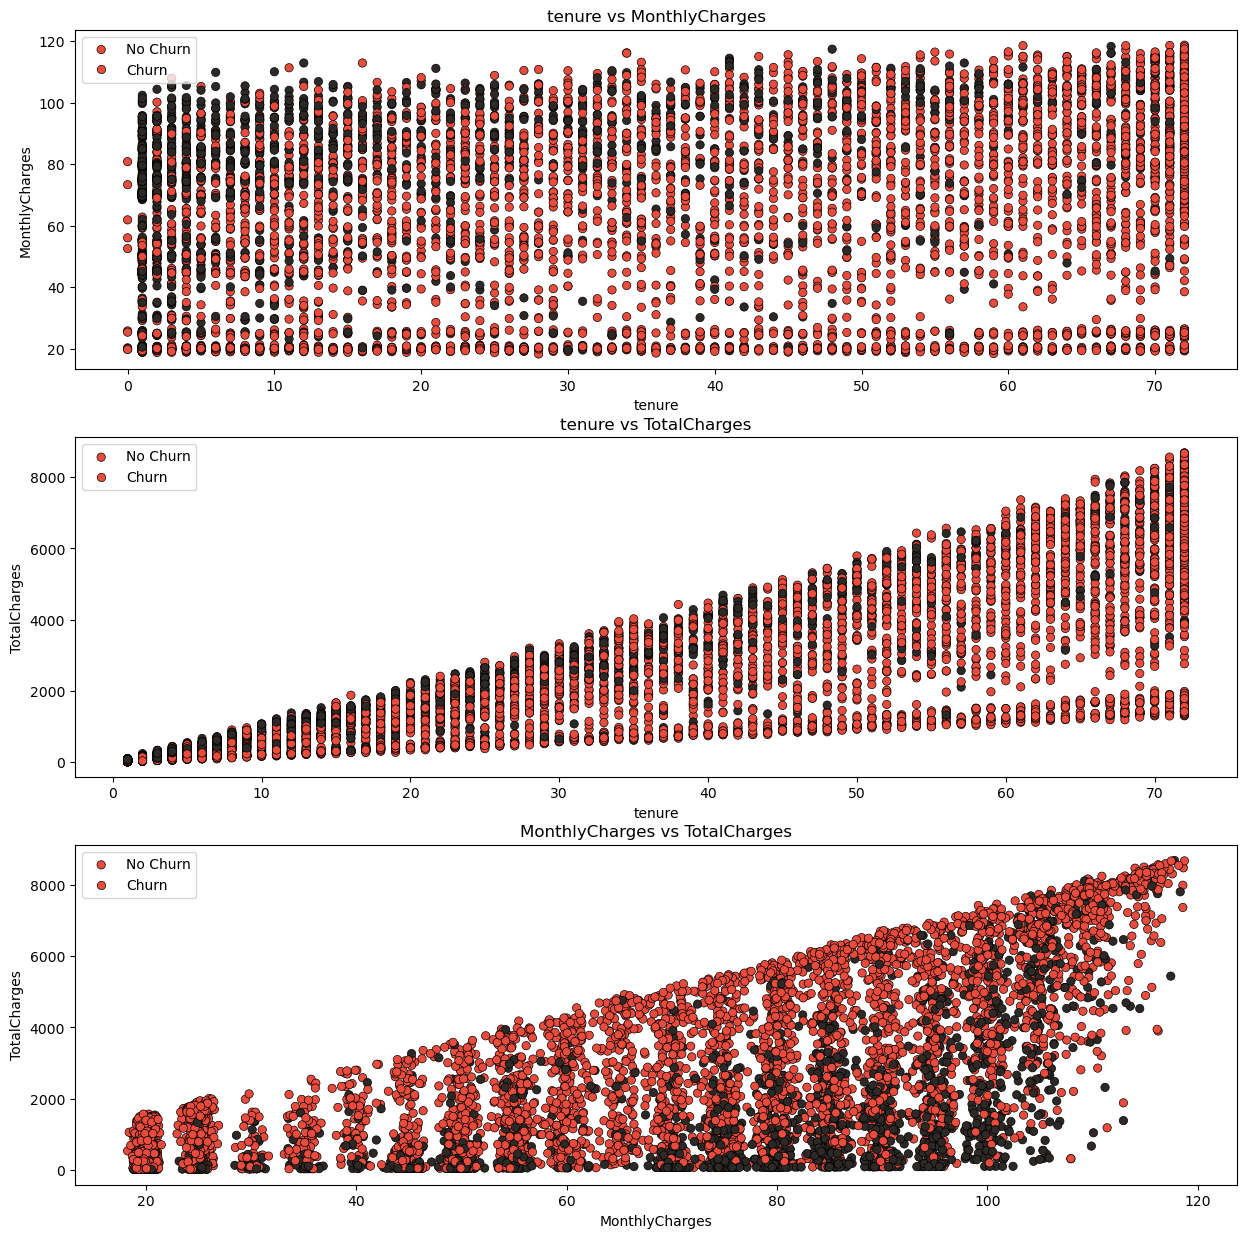

In [85]:
a = 0
fig,ax = plt.subplots(nrows = 3,ncols = 1,figsize = (15,15))
for i in range(len(numerical_features)):
    for j in range(len(numerical_features)):
        if i != j and j > i:
            a += 1
            plt.subplot(3,1,a)
            sns.scatterplot(x = numerical_features[i],y = numerical_features[j],data = df1,hue = 'Churn',palette = colors,edgecolor = 'black');
            plt.legend(['No Churn','Churn'],loc = 'upper left',)
            title = numerical_features[i] + ' vs ' + numerical_features[j]
            plt.title(title)

- **Tenure and MonthlyCharges Relationship:**
  - For tenure within the 0-20 months period, customer churn occurs across various MonthlyCharges values.
  - From 20-60 months tenure, customers with higher MonthlyCharges values (70-120) exhibit an increased likelihood of dropping out.

- **TotalCharges vs Tenure:**
  - As tenure increases, TotalCharges also increase, indicating a positive correlation.
  - Customers opting out are typically those charged the highest within their tenure period, along with some in the middle range.

- **MonthlyCharges Threshold:**
  - Customers tend to decide to cancel their subscriptions when MonthlyCharges reach 70 and above.

These insights emphasize the nuanced relationships between tenure, MonthlyCharges, and TotalCharges, providing valuable information for optimizing pricing strategies and customer retention efforts.

# Overview of Exploratory Data Analysis

In customer churn analysis, certain categorical features reveal distinct hierarchies crucial for targeted retention strategies. **Male** customers are more likely to churn than females, while **SeniorCitizens** exhibit lower churn rates. Not having a **partner** or **dependents** increases churn likelihood. Regarding services, having **phone service** and **multiple lines** correlates with lower churn, and **fiber optic** internet users are more prone to churn than DSL users. The absence of online security, online backup, etc., indicates higher churn.

Contract-wise, **month-to-month** contracts show higher churn than one-year and two-year contracts. **PaperlessBilling** customers are more likely to churn. In payment methods, **electronic checks** users have a higher churn risk, followed by mailed checks, bank transfers (automatic), and credit cards (automatic). Understanding these hierarchies is essential for devising effective retention strategies.

## Addressing Data Imbalance with SMOTE:

In [86]:
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.impute import SimpleImputer

In [87]:
cols = list(df1.columns)
cols.remove('Churn')

x=df1.loc[:,cols]
y=df1.loc[:,'Churn']

imputer = SimpleImputer(strategy='mean')
x=imputer.fit_transform(x)

over = SMOTE(sampling_strategy=1)

x1,y1=over.fit_resample(x,y)
print("Class distribution before SMOTE:", Counter(y))
print("Class distribution after SMOTE:", Counter(y1))

Class distribution before SMOTE: Counter({0: 5174, 1: 1869})
Class distribution after SMOTE: Counter({0: 5174, 1: 5174})


Train-test-split

In [88]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.20,random_state=2)

## Visualizing Correlation Matrix:

To generate a correlation matrix visualization, a new dataframe is constructed, incorporating values solely from x_train and y_train.



In [92]:
# Creating a DataFrame from x_train
x_train_df = pd.DataFrame(x_train, columns=cols)

# Creating a DataFrame for y_train
y_train_df = pd.DataFrame({'Churn': y_train})

# Concatenate x_train_df and y_train_df along columns
x_train_test = pd.concat([x_train_df, y_train_df], axis=1)

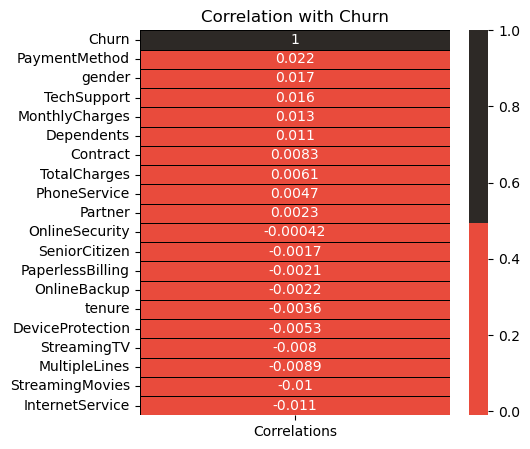

In [93]:
# Calculate correlation matrix
corr = x_train_test.corr()['Churn'].sort_values(ascending=False).to_frame()
corr.columns = ['Correlations']

# Plot heatmap
plt.subplots(figsize=(5, 5))
sns.heatmap(corr, annot=True, cmap=colors, linewidths=0.4, linecolor='black')
plt.title('Correlation with Churn')
plt.show()

## Correlation Analysis Results:

Upon scrutinizing the correlation matrix, it is evident that "MulipleLines," "PhoneService," "gender," "StreamingTV," "StreamingMovies," and "InternetService" exhibit negligible correlation coefficients. As a strategic decision, these features are deemed non-contributory and are slated for removal.

# Categorical Feature Selection Strategy:

In [94]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

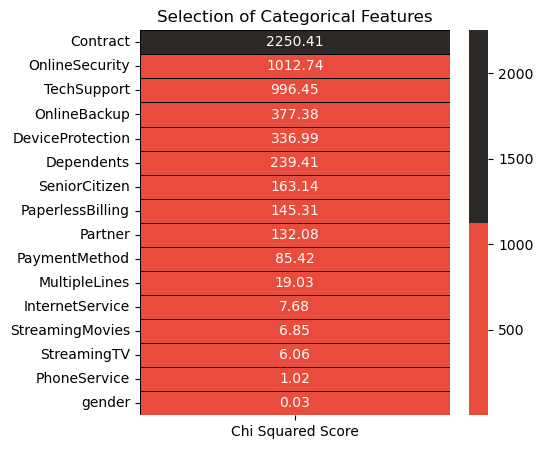

In [95]:
#Chi-Squared Test :

features = x_train_df.loc[:,categorical_features]
target = pd.DataFrame(y_train)

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['Chi Squared Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Chi Squared Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Categorical Features');

## Low-Relevance Categorical Features:

Following a thorough analysis, it is observed that the categorical features "PhoneService," "gender," "StreamingTV," "StreamingMovies," "MultipleLines," and "InternetService" demonstrate a notably low association with the target variable "Churn."

Considering this, a judicious decision has been made to exclude these features from the modeling process. This feature elimination aims to enhance model efficiency and accuracy by focusing on the categorical variables that exhibit a more substantial relation to the prediction of churn.

# Numerical Feature Selection Approach:

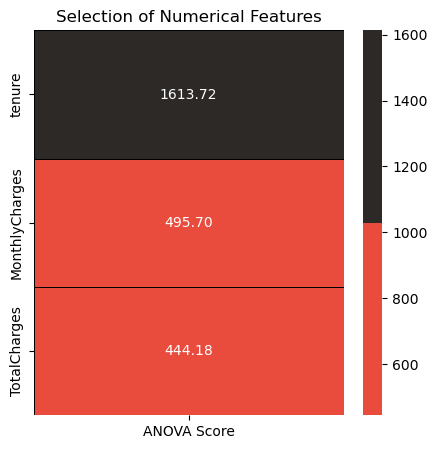

In [97]:
#ANOVA Test :

from sklearn.feature_selection import f_classif

features = x_train_df.loc[:,numerical_features]
target = pd.DataFrame(y_train)

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'ANOVA Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Numerical Features');

## ANOVA Test Results for Numerical Features:

Following the ANOVA test, it is observed that higher ANOVA scores indicate greater importance of a feature in relation to the target variable. Based on the obtained results, it is determined that all numerical features possess noteworthy ANOVA scores.

Consequently, the decision has been made to retain all numerical features for the modeling process. This inclusion is grounded in the understanding that each numerical feature, as indicated by its ANOVA score, contributes significantly to the predictive capabilities of the model. This comprehensive approach aims to capture the collective influence of all relevant numerical features on the target variable.

In [98]:
x_train=x_train_df.drop(columns = ['PhoneService', 'gender','StreamingTV','StreamingMovies','MultipleLines','InternetService'])
x_test_df = pd.DataFrame(x_test, columns=cols)
x_test=x_test_df.drop(columns = ['PhoneService', 'gender','StreamingTV','StreamingMovies','MultipleLines','InternetService'])


## Data Scaling for Machine Learning Models:

In [100]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

mms = MinMaxScaler() #Min Max scaling
ss = StandardScaler() #Standardization

columns_to_scale = ['tenure','MonthlyCharges','TotalCharges']

x_train[columns_to_scale] = mms.fit_transform(x_train[columns_to_scale])
x_test[columns_to_scale] = mms.fit_transform(x_test[columns_to_scale])

## Feature Selection & Data Splitting for Modeling:

In [101]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve

Train the model on the training set and evaluate its performance on the test set. This ensures a robust and effective machine learning model.

In [102]:
def model(classifier,x_train,y_train,x_test,y_test):
    
    classifier.fit(x_train,y_train)
    prediction = classifier.predict(x_test)
    
    accuracy =classifier.score(x_test,y_test)
    print("Accuracy is :",accuracy)
    
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,x_train,y_train,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,prediction)))

    

def model_evaluation(classifier,x_test,y_test):
    
    # Confusion Matrix
    plt.figure(figsize=(4,3))
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = 'Blues',fmt ='')

    
    # Classification Report
    print(classification_report(y_test,classifier.predict(x_test)))

## Xgboost Classifier :

Accuracy is : 0.8608695652173913
Cross Validation Score :  93.83%
ROC_AUC Score :  86.09%
--------------------------------------------------------------------------------


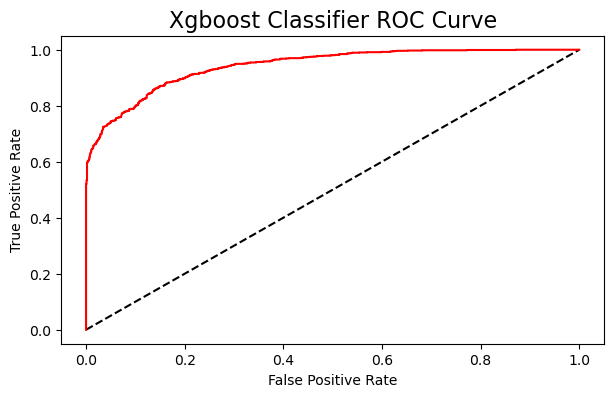

--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1040
           1       0.86      0.86      0.86      1030

    accuracy                           0.86      2070
   macro avg       0.86      0.86      0.86      2070
weighted avg       0.86      0.86      0.86      2070



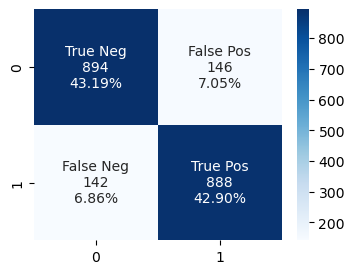

In [103]:
from xgboost import XGBClassifier

classifier_xgb = XGBClassifier(learning_rate= 0.01,max_depth = 3,n_estimators = 1000)
model(classifier_xgb,x_train,y_train,x_test,y_test)

print('-'*80)

#plotting roc curve
y_pred_prob =classifier_xgb.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(7, 4))

plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Xgboost Classifier',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Xgboost Classifier ROC Curve',fontsize=16)
plt.show();

print('-'*80)

model_evaluation(classifier_xgb,x_test,y_test)

## Random Forest Classifier :

Accuracy is : 0.8173913043478261
Cross Validation Score :  89.82%
ROC_AUC Score :  81.77%
--------------------------------------------------------------------------------


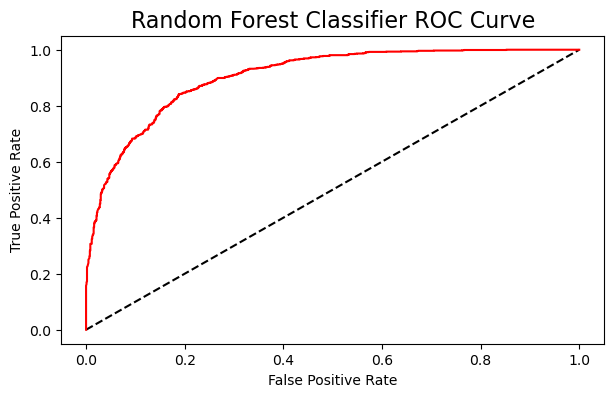

--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.76      0.81      1040
           1       0.78      0.88      0.83      1030

    accuracy                           0.82      2070
   macro avg       0.82      0.82      0.82      2070
weighted avg       0.82      0.82      0.82      2070



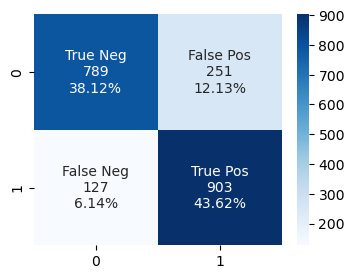

In [104]:
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(max_depth = 4,random_state = 0)

model(classifier_rf,x_train,y_train,x_test,y_test)

print('-'*80)

#plotting roc curve
y_pred_prob =classifier_rf.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(7, 4))

plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Random Forest Classifier',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Classifier ROC Curve',fontsize=16)
plt.show();

print('-'*80)

model_evaluation(classifier_rf,x_test,y_test)

## Decision Tree Classifier :

Accuracy is : 0.7917874396135266
Cross Validation Score :  86.32%
ROC_AUC Score :  79.19%
--------------------------------------------------------------------------------


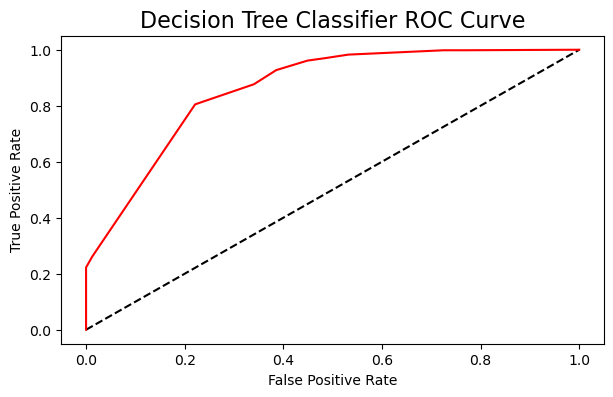

--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.78      0.79      1040
           1       0.78      0.80      0.79      1030

    accuracy                           0.79      2070
   macro avg       0.79      0.79      0.79      2070
weighted avg       0.79      0.79      0.79      2070



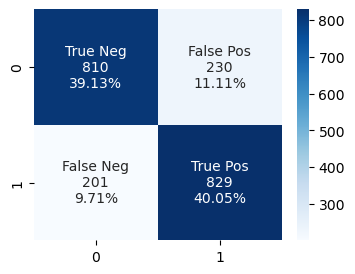

In [105]:
from sklearn.tree import DecisionTreeClassifier

classifier_dt = DecisionTreeClassifier(random_state = 1000,max_depth = 4,min_samples_leaf = 1)

model(classifier_dt,x_train,y_train,x_test,y_test)

print('-'*80)

#plotting roc curve
y_pred_prob =classifier_dt.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(7, 4))

plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Decision Tree Classifier',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree Classifier ROC Curve',fontsize=16)
plt.show();

print('-'*80)

model_evaluation(classifier_dt,x_test,y_test)

## Logistic Regression Classifier

Accuracy is : 0.7657004830917874
Cross Validation Score :  84.70%
ROC_AUC Score :  76.59%
--------------------------------------------------------------------------------


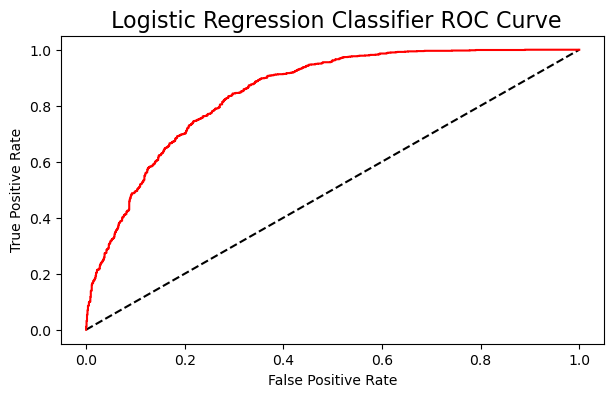

--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.79      0.73      0.76      1040
           1       0.74      0.80      0.77      1030

    accuracy                           0.77      2070
   macro avg       0.77      0.77      0.77      2070
weighted avg       0.77      0.77      0.77      2070



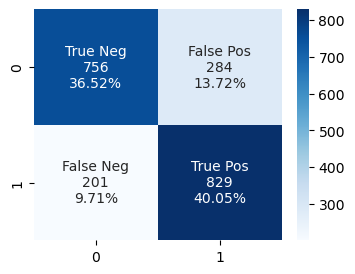

In [106]:
from sklearn.linear_model import LogisticRegression

classifier_lr = LogisticRegression()

model(classifier_lr,x_train,y_train,x_test,y_test)

print('-'*80)

#plotting roc curve
y_pred_prob =classifier_lr.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(7, 4))

plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Logistic Regression Classifier',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(' Logistic Regression Classifier ROC Curve',fontsize=16)
plt.show();

print('-'*80)

model_evaluation(classifier_lr,x_test,y_test)

# Algorithm Results Table
Quantifying Success: Comprehensive Results Table for Machine Learning Algorithms

In [107]:
data = {
    'ML Algorithm': ['XGBClassifier', 'RandomForestClassifier', 'DecisionTreeClassifier', 'LogisticRegressionClassifier'],
    'Accuracy': [85.70, 81.01, 79.46, 77.43],
    'Cross Validation Score': [93.84, 89.91, 86.07, 84.70],
    'ROC AUC Score': [85.70, 81.04, 79.48, 77.46],
    'F1 Score (Churn)': [86, 82, 80, 78]
}

results_df = pd.DataFrame(data)
results_df

,ML Algorithm,Accuracy,Cross Validation Score,ROC AUC Score,F1 Score (Churn)
0,XGBClassifier,85.70,93.84,85.70,86
1,RandomForestClassifier,81.01,89.91,81.04,82
2,DecisionTreeClassifier,79.46,86.07,79.48,80
3,LogisticRegressionClassifier,77.43,84.70,77.46,78


# Approaches to Diminish Customer Churn and Amplify Revenue

**Strategic Recommendations for Telco Company**:

1. **Targeted Customer Segmentation:**
   - Focus on three key customer segments: SeniorCitizen, those living with a Partner, and individuals living alone.

2. **SeniorCitizen Strategy:**
   - Acknowledge that SeniorCitizen customers are willing to pay a premium. Provide high-quality services tailored to their needs.

3. **Affordable Entry Point:**
   - Establish an affordable and accessible entry point for new customers. Prioritize services like OnlineSecurity, OnlineBackup, DeviceProtection, and TechSupport in the first 6 months to secure a strong foundation.

4. **Streaming Services Optimization:**
   - Make StreamingTV and StreamingMovies affordable for all customer segments. Target diverse content preferences and streamline the payment process.

In [108]:
import joblib

# Suppose you have trained these:
# classifier_xgb = your trained model
# mms = MinMaxScaler fitted on numeric cols
# features = list(x_train.columns)  # selected features

artifacts = {
    "model": classifier_xgb,
    "scaler": mms,
    "selected_features": features
}

# Save to pickle file
joblib.dump(artifacts, "artifacts.pkl")

print("✅ Saved artifacts.pkl successfully!")

✅ Saved artifacts.pkl successfully!
